# Human Resource Department Case-Study
This case study is to help users understand how to leverage the power of data science to reduce employee turnover and transform human resource department. 
**Problem:** Hiring and retraining employees are time and resource consuming tasks. Often time, a company may spend 15-20% of the an employees salary to train the new recruit and spend 40% of their working horus on hiring, which does not generate any income. 

In [2]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# connecting to database
employee_dataframe = pd.read_csv('Human_Resources.csv')
pd.set_option('display.max_columns',None)
employee_dataframe.head(5)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Analyzing Database columns: <br>
**Age**: This could be a factor as older employees who have families, mortgages may not be reluctant to leave the job, however this depends on other factors provided in this table. <br>
**Distance From Home**: Further away from the company may be a factor of attrition. <br>
**Relationship/Job/Employement Saticfaction**: An satisfied employee who also get along with everyone and liked by others may not be inclined to leave a company, such as promotion, years worked at the company, years with current manager etc. <br>
**Work Life Balance**:Is the employee overworked? <br>
**Hourly rate/monthly income/ stock options**: To check if the employee is getting paid properly proportionally to their job role and marital status. <br>




In [4]:
employee_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
employee_dataframe.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Changing Attritition, Overtime, and Over18 columns from string (Yes/No) to int so it can be easier to visualize

In [6]:
# modifying attritition column 
employee_dataframe['Attrition'] = employee_dataframe['Attrition'].apply(lambda x:1 if x == "Yes" else 0)
# mofidying Overtime column
employee_dataframe['OverTime'] = employee_dataframe['OverTime'].apply(lambda x:1 if x == "Yes" else 0)
# modifying Over18 column
employee_dataframe['Over18'] = employee_dataframe['Over18'].apply(lambda x:1 if x == "Y" else 0)

<AxesSubplot:>

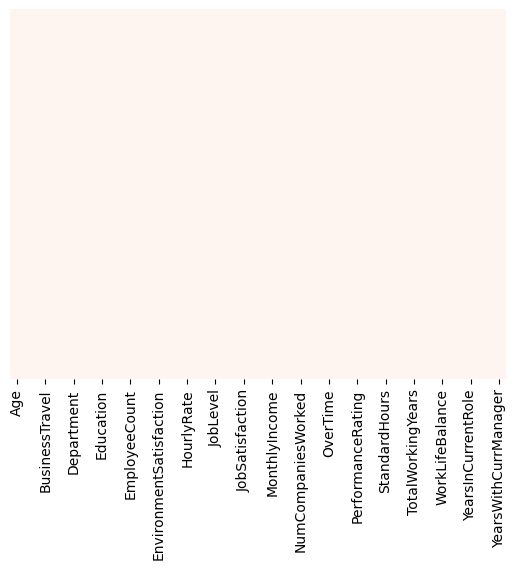

In [7]:
# Checking for missing data such as null, using Seaborn heat map
sns.heatmap(employee_dataframe.isnull(), yticklabels=False, cbar=False, cmap='Reds')

From the heatmap, we can see that there are no null values present in the dataframe. Now we can possibly plot a histogram to visualize each of the attributes.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>],
       [<AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>],
       [<AxesSubplot:title={'center':'Over18'}>,
        <AxesSubplot:title={'center':'OverTime'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
       

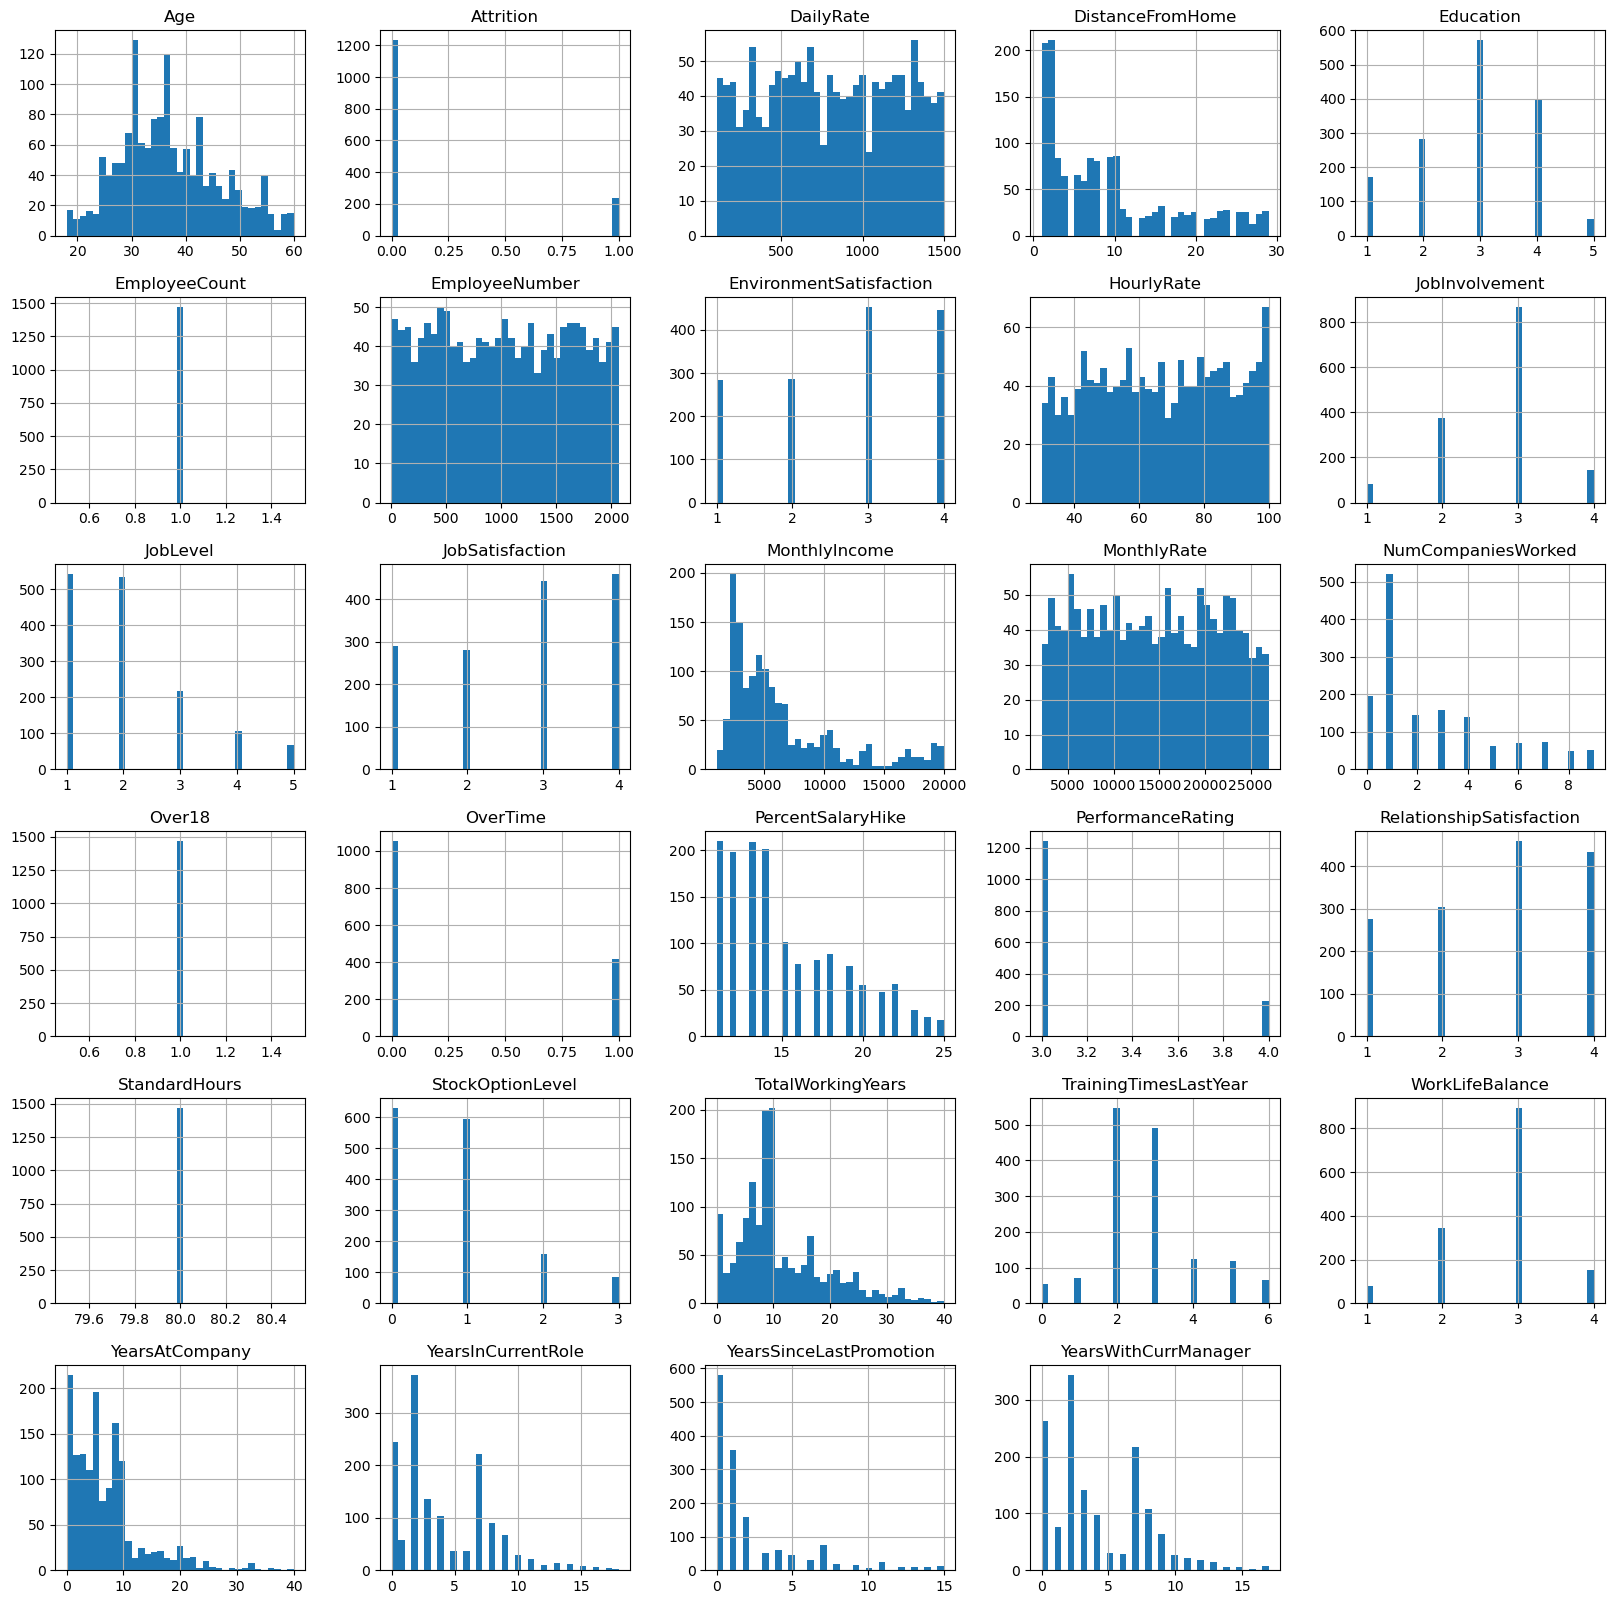

In [8]:
employee_dataframe.hist(bins=35,
                        figsize=(20,20),
                        )

By looking at the chats <br> 
Monthly income, it is very tail-heavy as lot of employee gets paid between 0-5000 per month. <br>
Salary hike, it is also very tail-heavy, a very common % increase is around 15% and 20-25% is at a low percentage.  <br>
EmployeeCount, EmployeeNumber, StandardHours, and Over18 chat does not contrubute to finding the solution as they all have one single value, so they can be dropped. <br>
MonthlyRate is irelevent as we have hourly rate and monthly income <br><br>

Once it is completed, we can check the Attrition table to see details about employees who has left the company.


In [9]:
employee_dataframe.drop(['EmployeeCount','EmployeeNumber','StandardHours','Over18','MonthlyRate','DailyRate'], axis=1, inplace=True)

In [10]:
# Breaking down the dataframe into two: Employees who have left, and employees who have stayed
left_df = employee_dataframe[employee_dataframe['Attrition'] == 1]
stayed_df = employee_dataframe[employee_dataframe['Attrition'] == 0]

In [11]:
# Analyzing data for employees who have left
print('Total employees left: ', len(left_df))
print(len(left_df)/len(employee_dataframe) * 100, '% of the employee has left')
left_df.describe()

Total employees left:  237
16.122448979591837 % of the employee has left


,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,2.678519,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,1.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,5.000000,1.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [12]:
#Analyzing data for employees who have stayed
print('Total employees stayed: ', len(stayed_df))
print(len(stayed_df)/len(employee_dataframe) * 100, '% of the employee has stayed')
stayed_df.describe()

Total employees stayed:  1233
83.87755102040816 % of the employee has stayed


,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,2.64558,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,2.46009,0.423787,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,0.00000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,1.00000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,2.00000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,4.00000,0.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,9.00000,1.000000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


<AxesSubplot:>

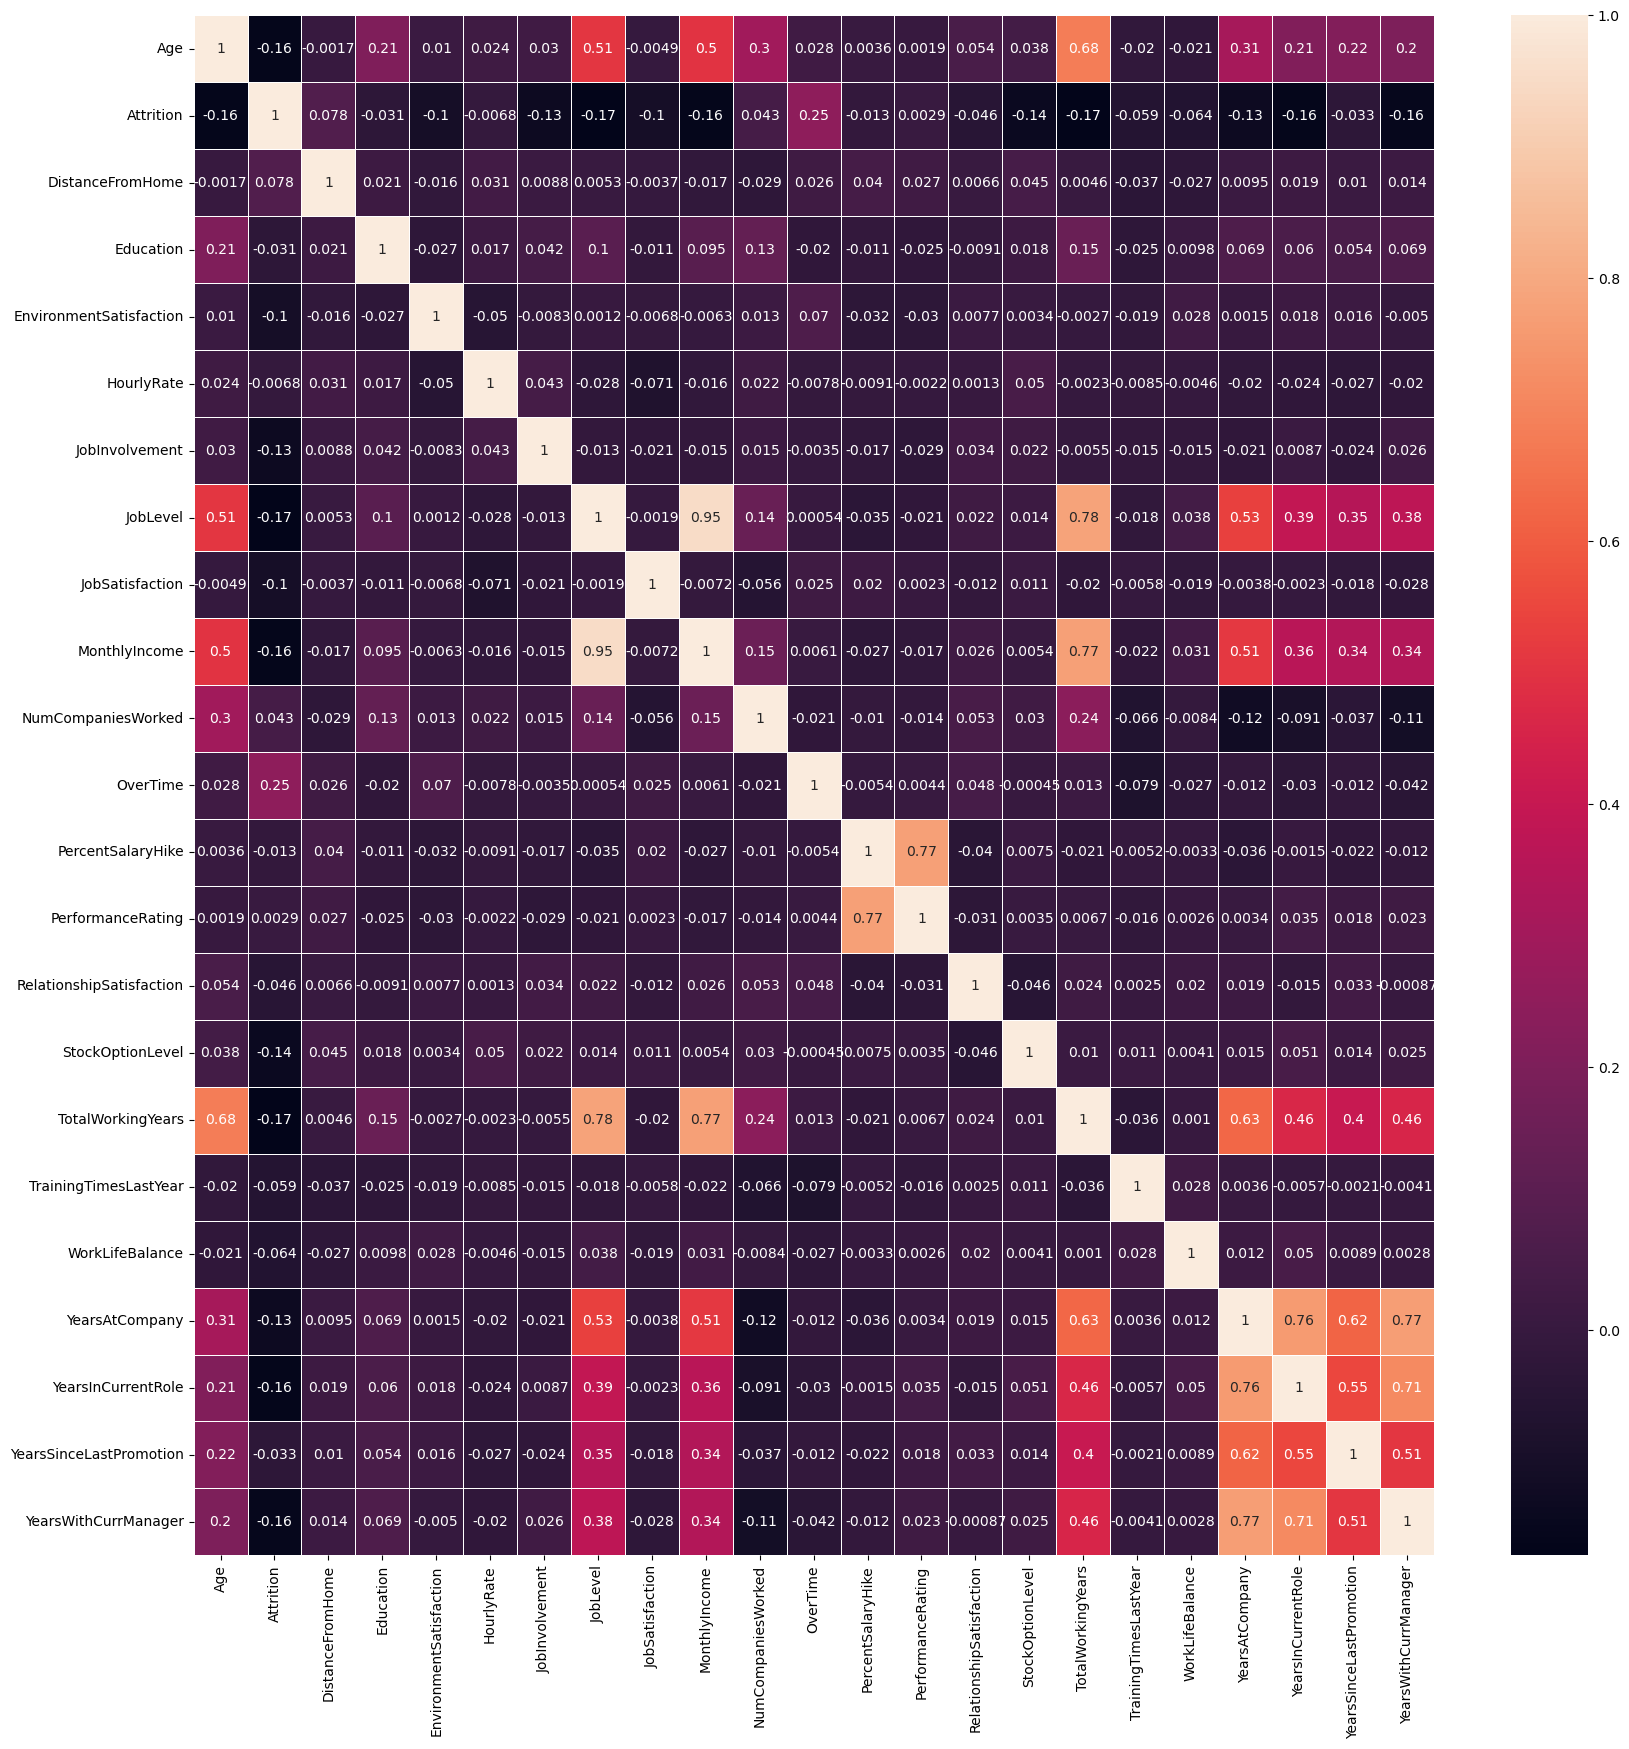

In [13]:
correlations = employee_dataframe.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(correlations, annot=True, linewidths=0.5)

Upon analyzing both dataframes, we can say that, <br>
Age plays a factor, as the median age is lower for employees who left<br>
Workplace is further from home for those who left<br>
Average Monthly income is lower for those employee who left<br>
Average overtime worked is higher for employees who left<br>

Monthly salary should be proportional to job role and years in current company and role.<br>
We can see that the employees who left were not in the company for long, such as 1-7 years, compared to those who stayed (3-10 years).<br>
The total years of experience is also lower for employees that left<br>
This could mean that the lower average monthly salary may not be a factor as salary increases with years of experience, years worked, and current role.<br>
This is confimed by looking at the correlation chart<br>


<AxesSubplot:xlabel='Age', ylabel='count'>

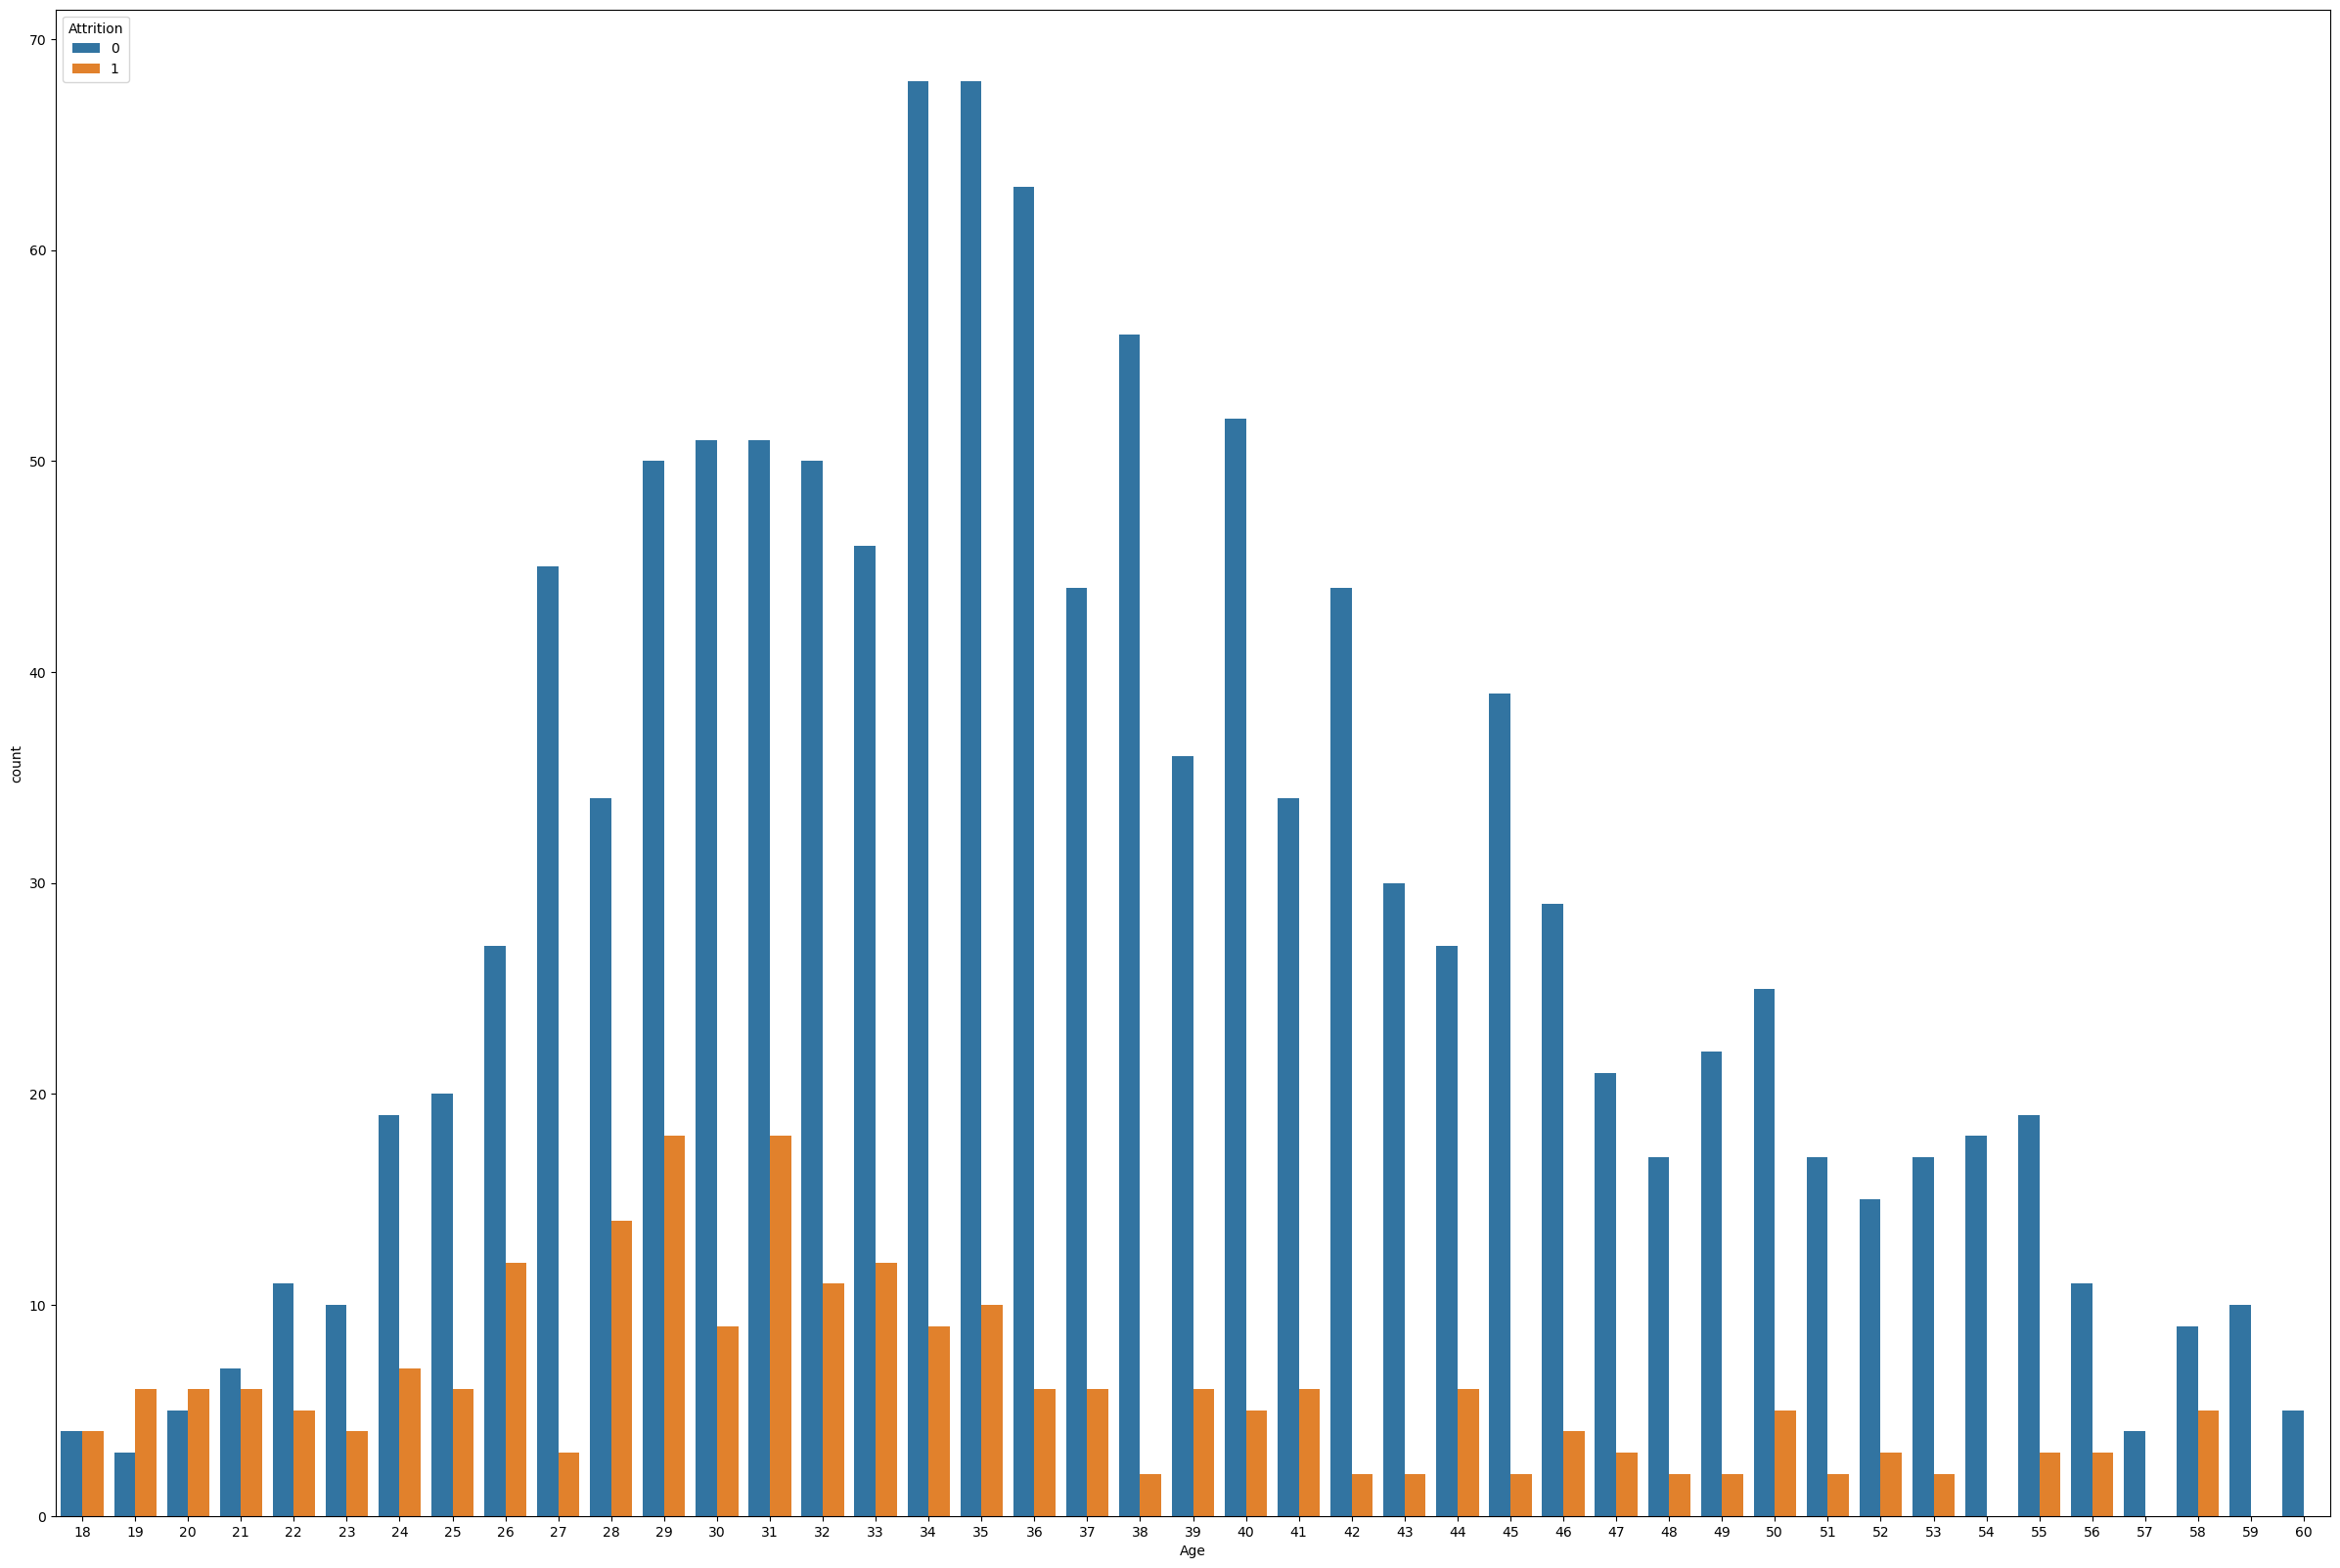

In [14]:
# Checking for relation between age and attrition
plt.figure(figsize=(30,20))
sns.countplot(x= 'Age', hue= 'Attrition', data=employee_dataframe)

By visualizing the graph, it looks like employees around the age 28-29 and 31 leaves the company the most. It is safe to say that age is a factor.

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

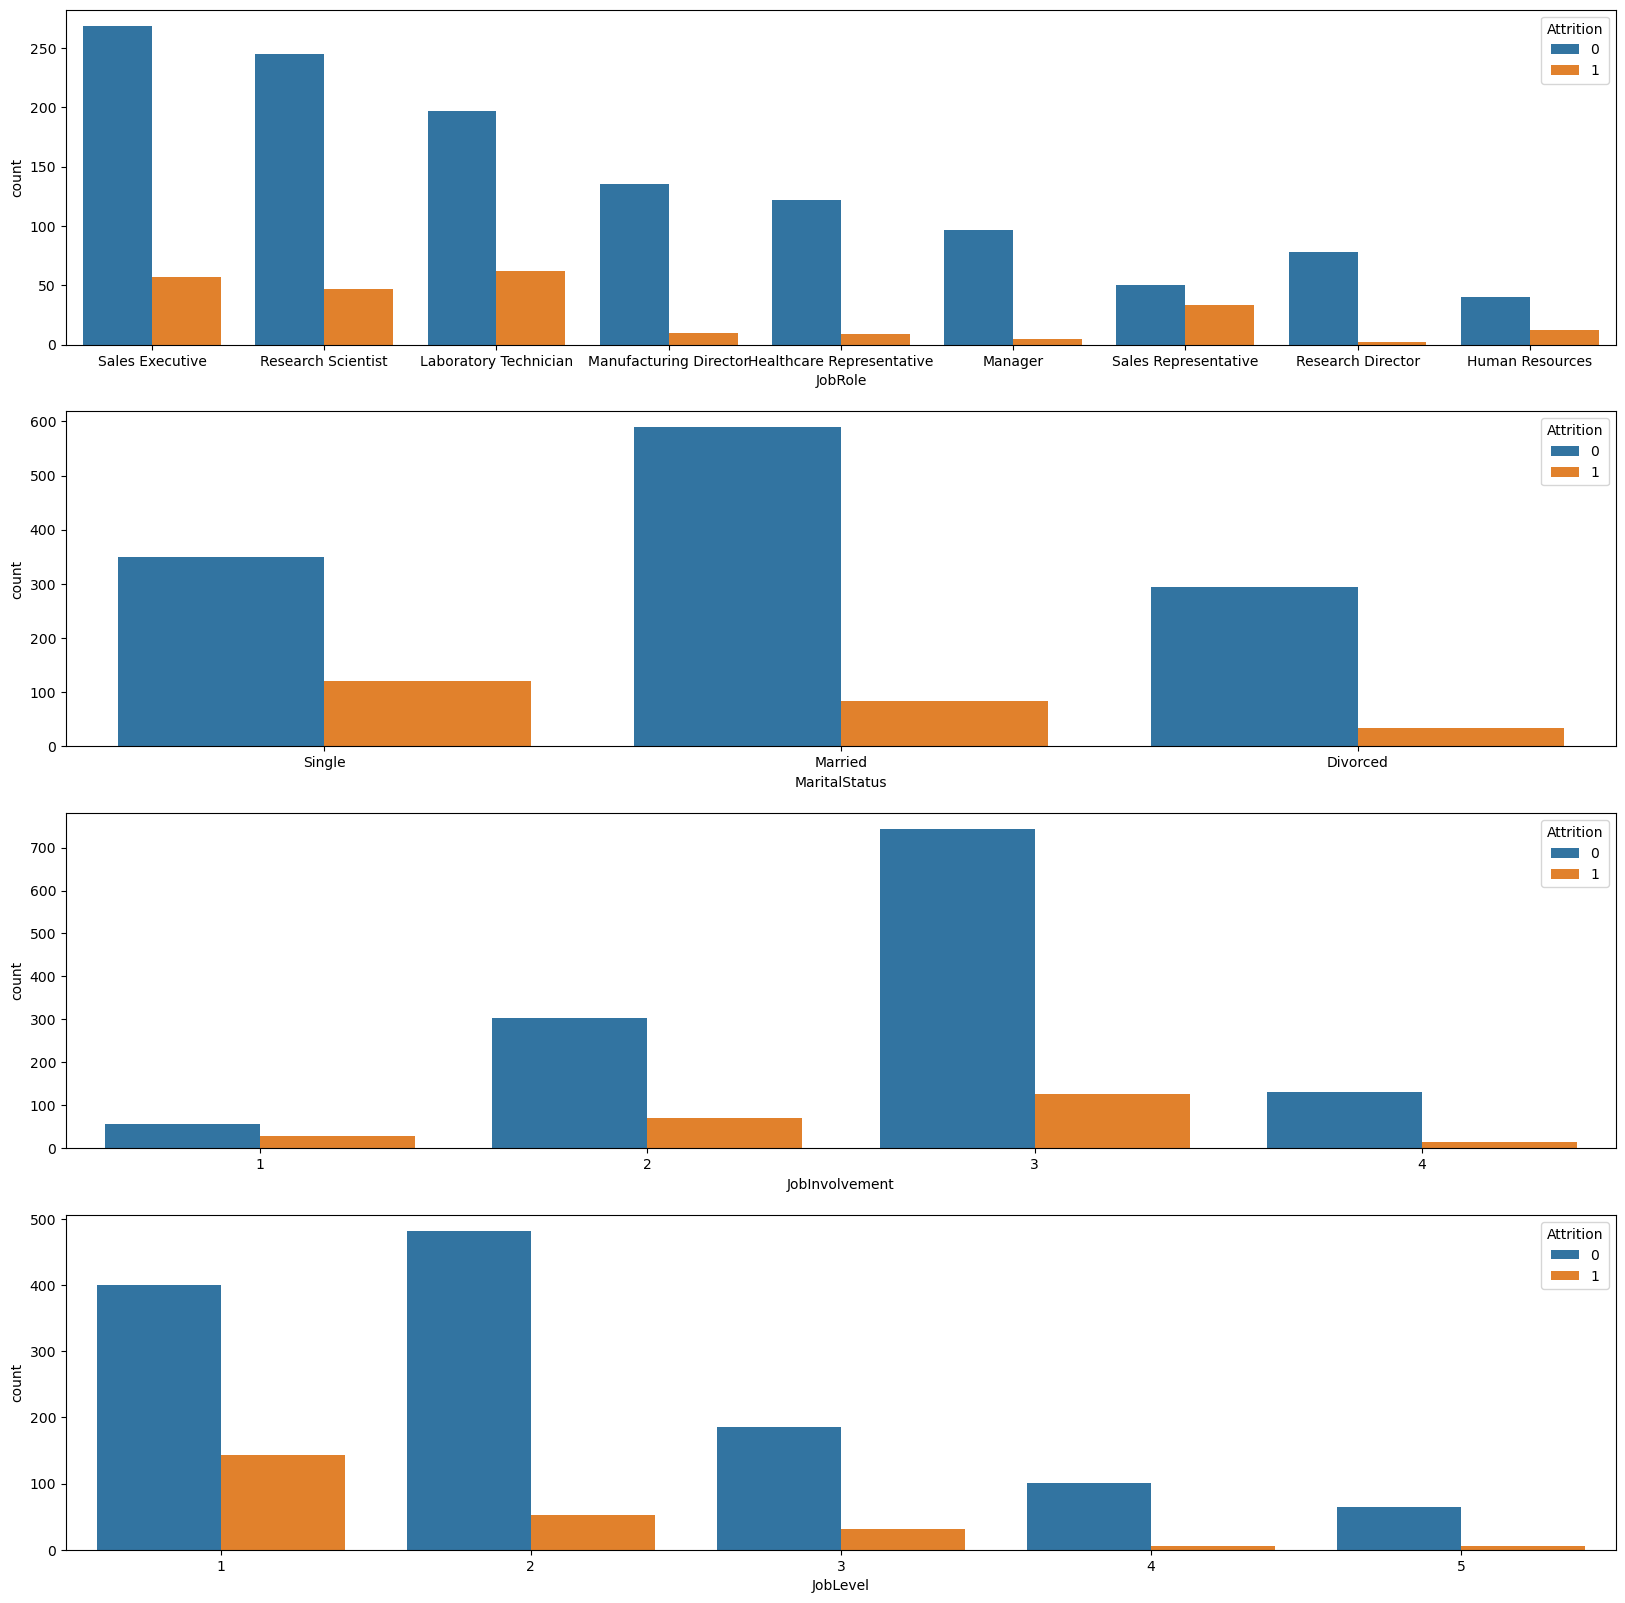

In [15]:
# Exploring the job role, marital status, job involvement and job level. 
plt.figure(figsize=(20,20))
plt.subplot(4,1,1)
sns.countplot(x='JobRole', hue='Attrition',data=employee_dataframe)
plt.subplot(4,1,2)
sns.countplot(x='MaritalStatus', hue='Attrition',data=employee_dataframe)
plt.subplot(4,1,3)
sns.countplot(x='JobInvolvement', hue='Attrition',data=employee_dataframe)
plt.subplot(4,1,4)
sns.countplot(x='JobLevel', hue='Attrition',data=employee_dataframe)


Upon analyzing the graphs, we can say that,<br>

Proportionaly, sales represnetatives have a high turnover rate<br>
Single employees tent to leave compared to married or divorced<br>
Less experienced emplyees tend to leave<br>
Less involved employees have a high turnover rate


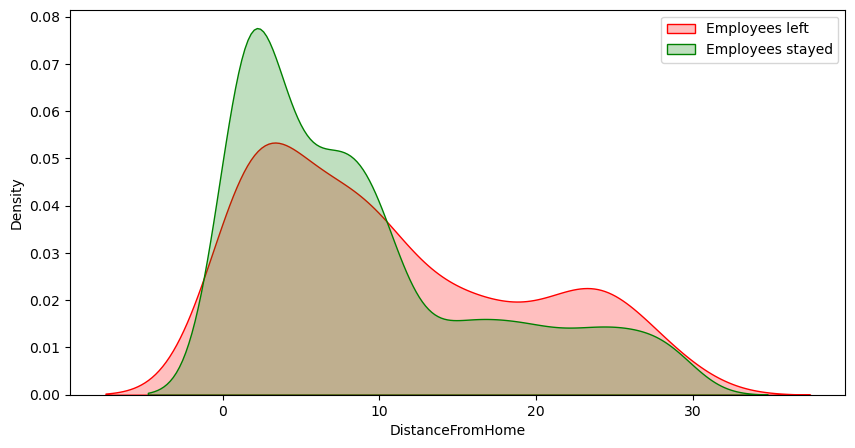

In [16]:
# Analyzing distance from home regarding attrition. 
# Developing a KDE (Karnel Density Estimate) which will be used for visualizing the probability density of a continous variable. 
plt.figure(figsize=(10,5))
sns.kdeplot(left_df['DistanceFromHome'], shade=True, label ='Employees left', color='red')
sns.kdeplot(stayed_df['DistanceFromHome'], shade=True, label ='Employees stayed', color='green')
plt.legend()

Upon analyzing the above KDE plot, we can visualize that employees that live around 10-20km from their work location tents to leave the job more. However, this is not the only reason as there is not a big difference compared to employees that stayed.

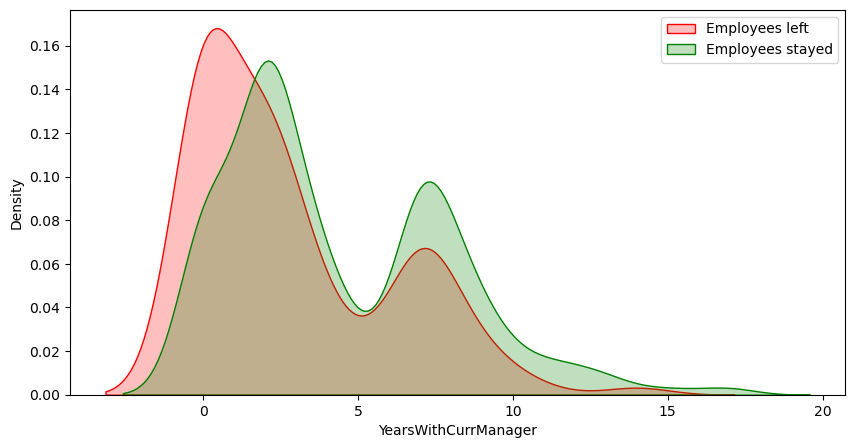

In [17]:
# Analyzing years with current manager with attrition
plt.figure(figsize=(10,5))
sns.kdeplot(left_df['YearsWithCurrManager'], shade=True, color='red', label = 'Employees left')
sns.kdeplot(stayed_df['YearsWithCurrManager'], shade=True, color='green', label = 'Employees stayed')
plt.legend()

This graph shows that a lot of the employees who has left has been with their current manager less than 1 year. This could possibly mean that the employees may not have liked working with their manager and left early on.

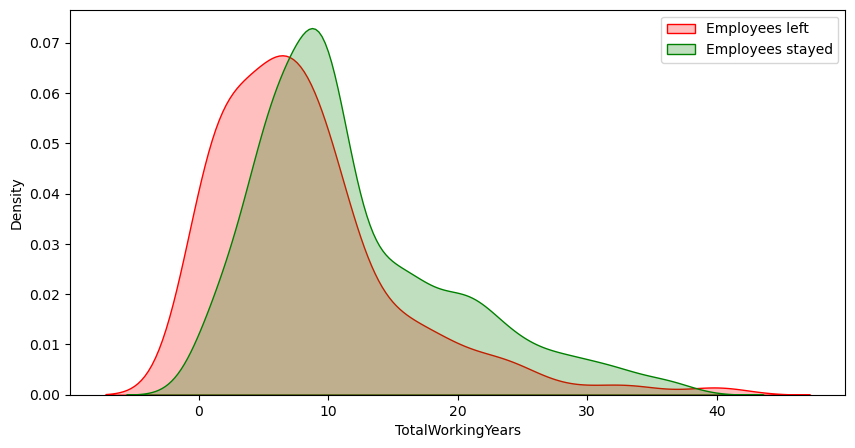

In [18]:
# Analyzing total working years with attrition
plt.figure(figsize=(10,5))
sns.kdeplot(left_df['TotalWorkingYears'], shade=True, color='red', label = 'Employees left')
sns.kdeplot(stayed_df['TotalWorkingYears'], shade=True, color='green', label = 'Employees stayed')
plt.legend()

Most of the employees that left, left duing 1st 5 years.

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Gender'>

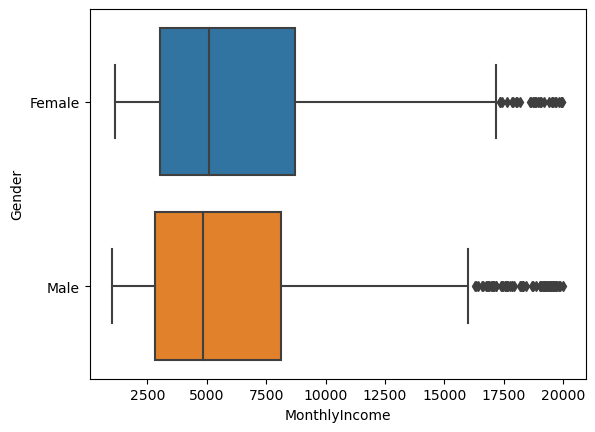

In [19]:
#Gender by monthly income
sns.boxplot(x = 'MonthlyIncome', y='Gender', data=employee_dataframe)

Average salary seems very similar to each other, so gender discrimination based on salary is not a constrain. 

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

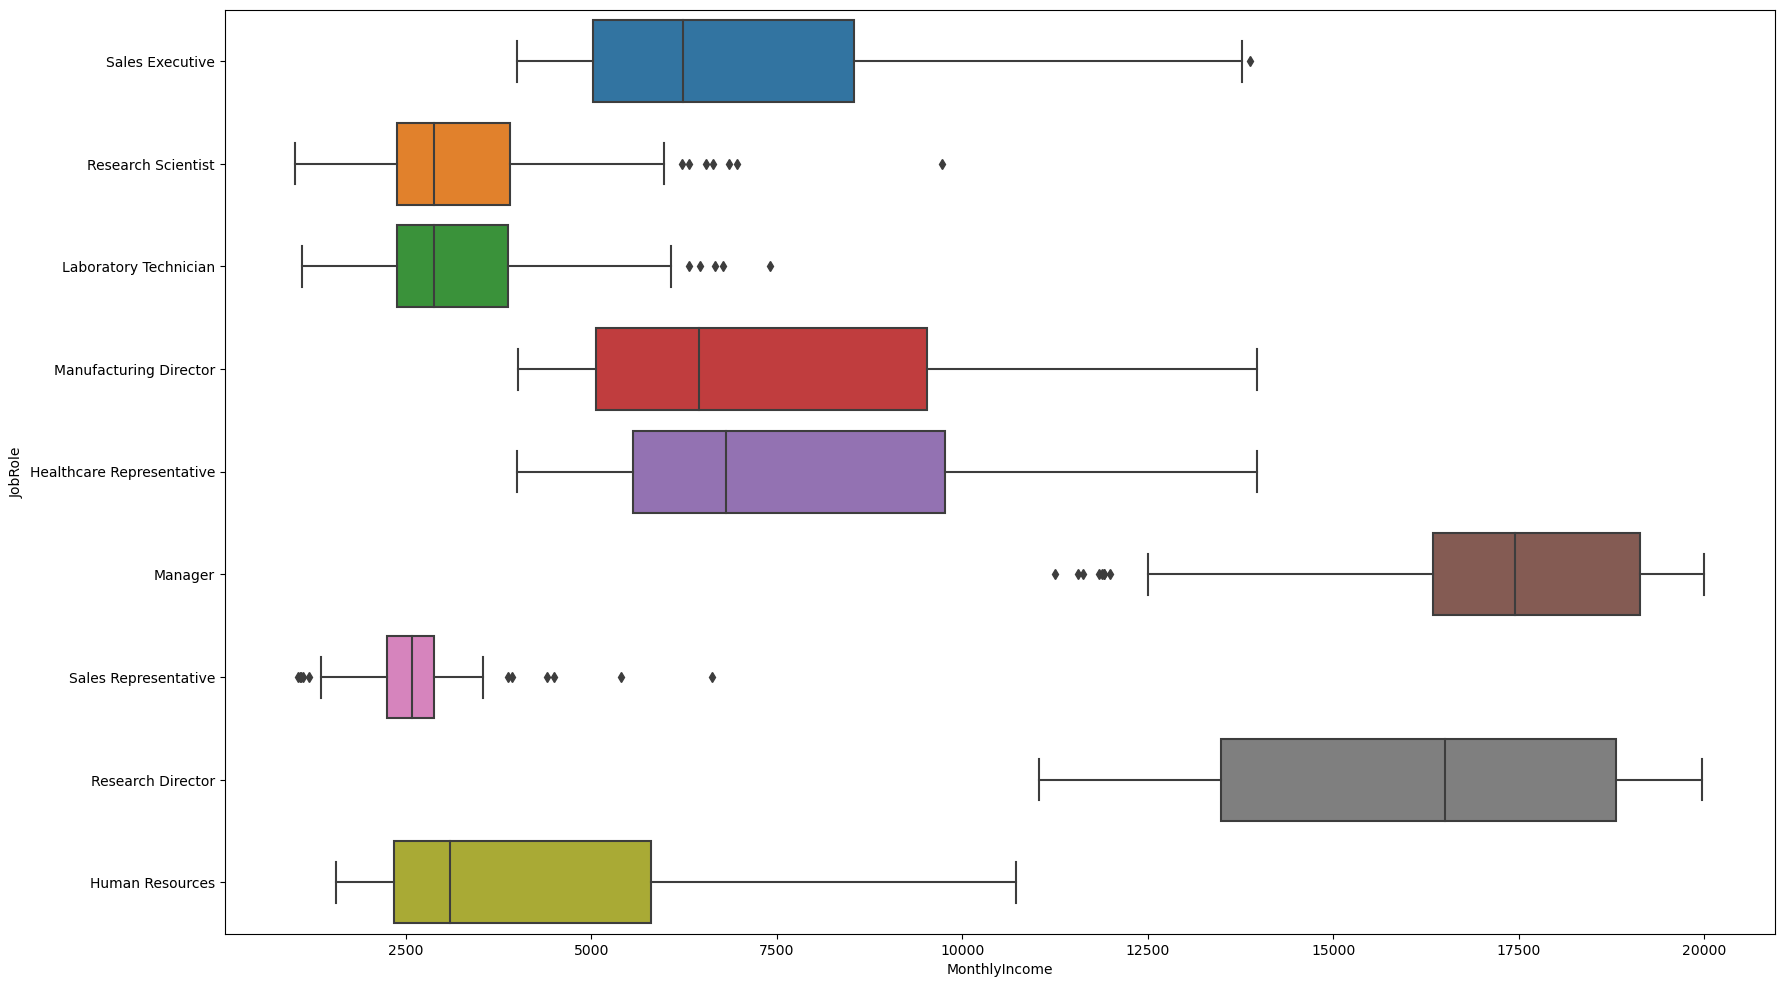

In [20]:
# job role vs monthly income
plt.figure(figsize=(20,12))
sns.boxplot(x = 'MonthlyIncome', y='JobRole', data=employee_dataframe)

Upon looking at the job role vs monthly income chat, we can say that a reason why sales representative role had the highest turnover rate is due to their monthly income. Their highest and lowest salary is already low compared to other job roles, with a few high outliers. 

## Data Processing

In [21]:
#Getting all categorical data and changing it to numeric value so it can be used for AI algorithm 
categorical = employee_dataframe[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
categorical



,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [22]:
from sklearn.preprocessing import OneHotEncoder
oneHotEncoder = OneHotEncoder()
categorical = oneHotEncoder.fit_transform(categorical).toarray()

In [23]:
#categorical.toarray()
categorical = pd.DataFrame(categorical)

In [24]:
categorical

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [25]:
numerical = employee_dataframe[['Age','DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome','NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
numerical

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,94,3,2,4,5993,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,8,1,3,61,2,2,2,5130,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,2,2,4,92,2,1,3,2090,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,3,4,4,56,3,1,3,2909,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,2,1,1,40,3,1,2,3468,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,23,2,3,41,4,2,4,2571,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,6,1,4,42,2,3,1,9991,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,4,3,2,87,4,2,2,6142,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,2,3,4,63,2,2,2,5390,2,0,14,3,4,0,17,3,2,9,6,0,8


In [26]:
#combining both numeric and categoric->numeric data into one
combined_data = pd.concat([categorical,numerical], axis=1)
combined_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Age,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,41,1,2,2,94,3,2,4,5993,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49,8,1,3,61,2,2,2,5130,1,0,23,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37,2,2,4,92,2,1,3,2090,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,33,3,4,4,56,3,1,3,2909,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,2,1,1,40,3,1,2,3468,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,36,23,2,3,41,4,2,4,2571,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,39,6,1,4,42,2,3,1,9991,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,4,3,2,87,4,2,2,6142,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,49,2,3,4,63,2,2,2,5390,2,0,14,3,4,0,17,3,2,9,6,0,8


In [27]:
#Scaling all the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(combined_data)

c:\Users\yasin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\yasin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [28]:
x

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [29]:
y = employee_dataframe['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [30]:
#Training/Evaluating the data using algorithms
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25)

**Using Logistic Regression Classifier**

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model_LogRegression = LogisticRegression()
model_LogRegression.fit(x_train, y_train, )

LogisticRegression()

In [32]:
y_pred_LogRegression = model_LogRegression.predict(x_test)

In [33]:
y_pred_LogRegression
# O indicating false that the employee will stay and 1 indicating true that the employee will leave

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
print ('Accuracy {}%'.format(100* accuracy_score (y_pred_LogRegression, y_test)))

Accuracy 89.94565217391305%


<AxesSubplot:>

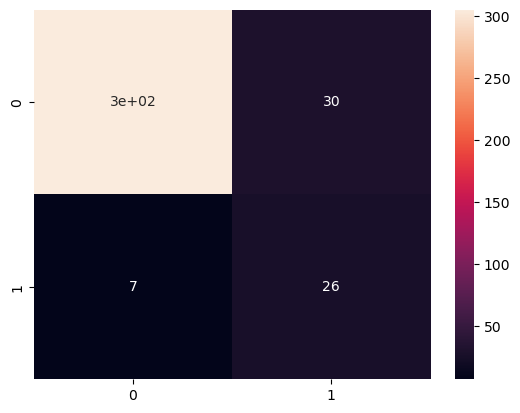

In [36]:
cm_LogRegression = confusion_matrix(y_pred_LogRegression, y_test)
sns.heatmap(cm_LogRegression,annot=True)

Using Logistic Regression Classifier with an accuracy of 89.6%<br>
First column (index 0) states that the model has provided, 2nd column (index 1) indicates the difference between the real world data vs model's prediction. <br>
First row (0) indicates employees that will stay.<br>
Second row (1) indicates employees that will leave.<br>

Upon looking at the heat-map above, we can see that <br>
model has predicted that around 3000 employees will be staying and it is correct (True positive).<br>
Model has accurately determined that 25 employees will leave the company (True negative).<br>
Model has falsely identified that 32 employees will leave the job but in actual, they will not (False positive/Type 1 error).<br>
Model has falsely identified that 6 employees will not leave the job (False negative/Type 2 error).<br>



**Using Random Forest Classifier**

In [38]:
from sklearn.ensemble import RandomForestClassifier
model_randomForest = RandomForestClassifier()
model_randomForest.fit(x_train, y_train)

RandomForestClassifier()

In [39]:
y_pred_randomForest = model_randomForest.predict(x_test)

<AxesSubplot:>

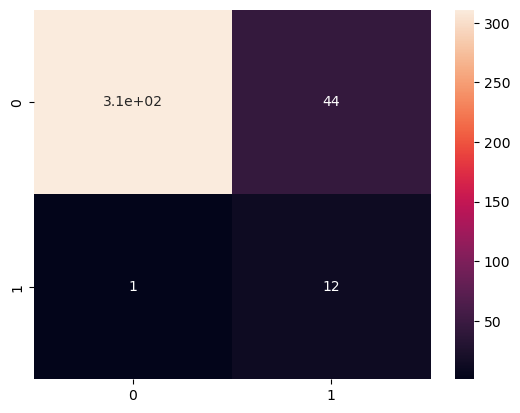

In [40]:
cm_RandomForest = confusion_matrix(y_pred_randomForest, y_test)
sns.heatmap(cm_RandomForest,annot=True)

**Using Artificial Neural Network Classifier**

In [47]:
import tensorflow as tf
model_tf = tf.keras.models.Sequential()
model_tf.add(tf.keras.layers.Dense(units = 500, activation='relu', input_shape = (48,)))
model_tf.add(tf.keras.layers.Dense(units=500, activation='relu'))
model_tf.add(tf.keras.layers.Dense(units=500, activation='relu'))
model_tf.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [48]:
model_tf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 500)               24500     
                                                                 
 dense_5 (Dense)             (None, 500)               250500    
                                                                 
 dense_6 (Dense)             (None, 500)               250500    
                                                                 
 dense_7 (Dense)             (None, 1)                 501       
                                                                 
Total params: 526,001
Trainable params: 526,001
Non-trainable params: 0
_________________________________________________________________


In [49]:
model_tf.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])


In [50]:
epochs_hist = model_tf.fit(x_train, y_train, epochs=100, batch_size=48)

Epoch 1/100
23/23 [==============================] - 1s 8ms/step - loss: 0.4271 - accuracy: 0.8185
Epoch 2/100
23/23 [==============================] - 0s 7ms/step - loss: 0.3648 - accuracy: 0.8485
Epoch 3/100
23/23 [==============================] - 0s 7ms/step - loss: 0.3171 - accuracy: 0.8775
Epoch 4/100
23/23 [==============================] - 0s 8ms/step - loss: 0.2986 - accuracy: 0.8820
Epoch 5/100
23/23 [==============================] - 0s 7ms/step - loss: 0.2545 - accuracy: 0.9020
Epoch 6/100
23/23 [==============================] - 0s 7ms/step - loss: 0.2223 - accuracy: 0.9138
Epoch 7/100
23/23 [==============================] - 0s 7ms/step - loss: 0.1921 - accuracy: 0.9265
Epoch 8/100
23/23 [==============================] - 0s 7ms/step - loss: 0.1638 - accuracy: 0.9446
Epoch 9/100
23/23 [==============================] - 0s 7ms/step - loss: 0.1217 - accuracy: 0.9619
Epoch 10/100
23/23 [==============================] - 0s 6ms/step - loss: 0.1010 - accuracy: 0.9655
Epoch 11/

In [54]:
y_pred_tf = model_tf.predict(x_test)
y_pred_tf = (y_pred_tf>0.5)

12/12 [==============================] - 0s 2ms/step


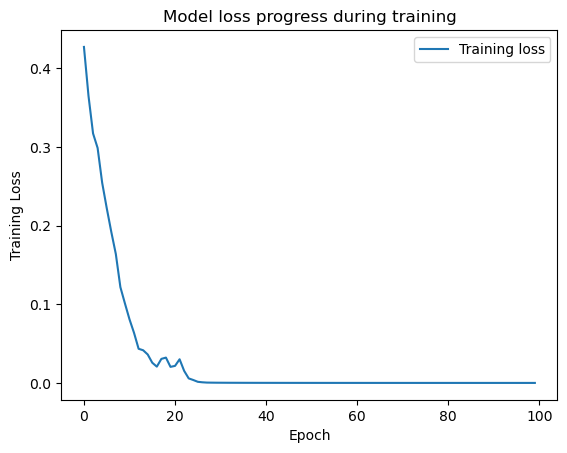

In [58]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model loss progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training loss'])

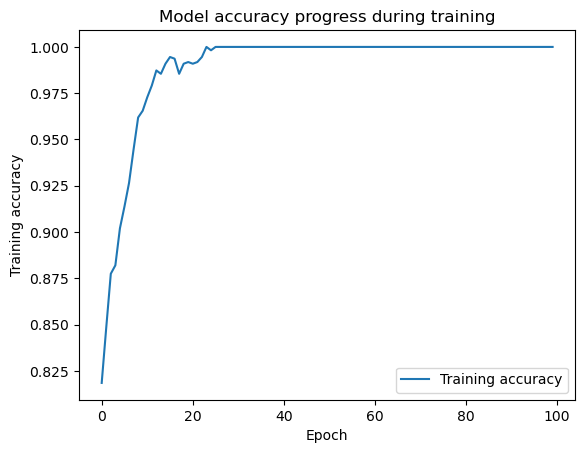

In [59]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model accuracy progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.legend(['Training accuracy'])

<AxesSubplot:>

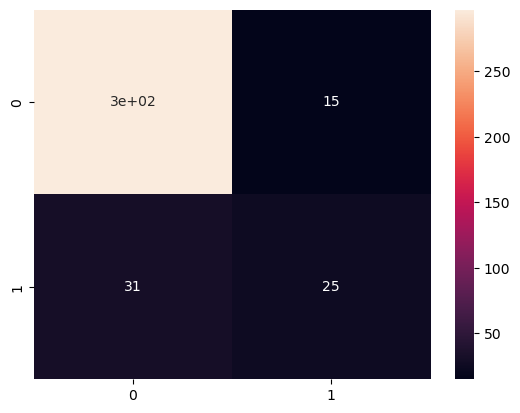

In [61]:
cm_tf = confusion_matrix(y_test, y_pred_tf)
sns.heatmap(cm_tf, annot=True)

## Viewing reports for each ML models ##

In [62]:
#Neural Network Classification report
print(classification_report(y_test,y_pred_tf))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       312
           1       0.62      0.45      0.52        56

    accuracy                           0.88       368
   macro avg       0.77      0.70      0.72       368
weighted avg       0.86      0.88      0.87       368



In [63]:
# Logistic Regression Classification report
print(classification_report(y_test,y_pred_LogRegression))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       312
           1       0.79      0.46      0.58        56

    accuracy                           0.90       368
   macro avg       0.85      0.72      0.76       368
weighted avg       0.89      0.90      0.89       368



In [64]:
#Random Forest Classification report
print(classification_report(y_test,y_pred_randomForest))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       312
           1       0.92      0.21      0.35        56

    accuracy                           0.88       368
   macro avg       0.90      0.61      0.64       368
weighted avg       0.88      0.88      0.84       368



**Conclusion**<br>
After analyzing Logistic Regression, Random Forest, and Neural Netowrk classifier, the precision for employees whom will stay in their respective company is high across all three models. However, the precision for employees who will leave is low and fluctuating often (except for random forest classification, but it has a low recall). This could mean that we will have possibly need more data from employee who has left their company to properly train the model to predict the employees who will leave the company. 
